In [42]:
from autodiff import Tensor 
from autodiff.datasets import fetch_mnist
import numpy as np

In [43]:
train, test = fetch_mnist()

In [44]:
print('Number of training images: ', len(train))
print('Image shape: ', train[0][0].shape)

Number of training images:  60000
Image shape:  (784,)


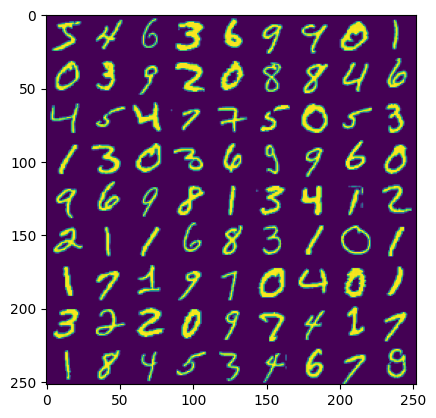

In [45]:
import matplotlib.pyplot as plt

N = 9
grid = np.array([np.array([i[0] for i in train[x*N:N*x+N]]).reshape(N*28, 28) for x in range(N)])
plt.imshow(np.concatenate(grid, axis=1))

In [46]:
def softmax(x: Tensor) -> Tensor:
    e_x = x.exp()
    return e_x / e_x.sum(dim=-1, keepdim=True)

def cross_entropy(x: Tensor, p: Tensor) -> Tensor:
    return -(p*x.log()).sum(dim=-1).mean()

In [47]:
def one_hot(n, i):
    arr = np.zeros(shape=(n,))
    arr[i] = 1
    return arr

In [48]:
class Linear:
    def __init__(self, n_input: int, n_output: int):
        self.W = Tensor(np.zeros((n_output, n_input)), requires_grad=True)
        self.b = Tensor(np.zeros((n_output)), requires_grad=True)

    def __call__(self, x: Tensor) -> Tensor:
        # batch size of 1
        if len(x.shape) == 1:
            return self.W @ x + self.b
        return x @ self.W.transpose() + self.b
        
    
    def zero_grad(self):
        self.W.zero_grad()
        self.b.zero_grad()

In [49]:
def cross_entropy(pred, labels):
    return (-(labels * pred.log()).sum(dim=-1)).mean()

def softmax(x):
    max_vals = np.max(x.data, axis=1, keepdims=True)
    s1 = (x - max_vals)
    e_x = s1.exp()
    soft = e_x / e_x.sum(dim=1, keepdim=True)
    return soft

In [50]:
def log_softmax(x):
    c = np.max(x.data, axis=-1, keepdims=True)
    xc = x - c 
    logsumexp = (xc.exp().sum(dim=-1, keepdim=True)).log()
    return xc - logsumexp


def cross_entropy_loss(prediction, label):
    logsoft = log_softmax(prediction) 

    # cross entropy
    loss = -(label*logsoft).sum(dim=-1).mean()
    return loss

In [51]:
class Linear:
    def __init__(self, n_input: int, n_output: int):
        random_state = np.random.RandomState(seed=1)
        self.W = Tensor(0.001 * random_state.rand(n_output, n_input).astype(np.float32), requires_grad=True)
        self.b = Tensor(0.001 * random_state.rand(n_output).astype(np.float32), requires_grad=True)

    def __call__(self, x: Tensor) -> Tensor:
        # batch size of 1
        if len(x.shape) == 1:
            return self.W @ x + self.b
        return x @ self.W.transpose() + self.b
        
    
    def zero_grad(self):
        self.W.zero_grad()
        self.b.zero_grad()

In [52]:
batch_size = 4000
batch = train[:batch_size]

features_batch = Tensor(list(map(lambda sublist: sublist[0], batch)), dtype=np.float32)
labels_batch = Tensor(np.array(list(map(lambda sublist: one_hot(10, sublist[1]), batch))))

In [ ]:
lr = 0.0002

n_input = 784
n_output = 10

In [ ]:
class Net:
    def __init__(self, n_input: int):
        self.l1 = Linear(n_input, 30)
        self.l2 = Linear(30, 10)
    
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        return x2
    
    def zero_grad(self):
        self.l1.zero_grad()
        self.l2.zero_grad()


net = Net(784)

In [53]:
# Train
for i in range(3000):
    probs = net.forward(features_batch)
    
    # cross entropy
    loss = cross_entropy_loss(probs, labels_batch)
    print('loss:', loss.data)
    
    loss.backward()


    net.l1.W.data -= lr * net.l1.W.grad
    net.l1.b.data -= lr * net.l1.b.grad

    net.l2.W.data -= lr * net.l2.W.grad
    net.l2.b.data -= lr * net.l2.b.grad
    
    def zero_grad(self):
        self.l1.zero_grad()
        self.l2.zero_grad()

loss: 2.3023765
loss: 2.2999418
loss: 2.2960734


loss: 2.2923257
loss: 2.29011
loss: 2.2900355
loss: 2.2915566
loss: 2.2931914
loss: 2.2933233
loss: 2.291108
loss: 2.2867894
loss: 2.2812207
loss: 2.275118
loss: 2.2686205
loss: 2.2612634
loss: 2.2521615
loss: 2.2401972
loss: 2.2241292
loss: 2.2026234
loss: 2.1742344
loss: 2.1373894
loss: 2.0904648
loss: 2.0321803
loss: 1.9627546
loss: 1.8862011
loss: 1.8120413
loss: 1.7503059
loss: 1.6980171
loss: 1.6340075
loss: 1.5388609
loss: 1.4192386
loss: 1.2993808
loss: 1.1925223
loss: 1.0958235
loss: 1.0090451
loss: 0.94272435
loss: 0.9013529
loss: 0.8726957
loss: 0.84919083
loss: 0.83443224
loss: 0.80476063
loss: 0.74524987
loss: 0.69157004
loss: 0.6761128
loss: 0.70278364
loss: 0.74899274
loss: 0.78464
loss: 0.7978926
loss: 0.79654324
loss: 0.79463154
loss: 0.8017002
loss: 0.82234037
loss: 0.8559394
loss: 0.88636786
loss: 0.89111644
loss: 0.87453294
loss: 0.8620643
loss: 0.8671854
loss: 0.88764477
loss: 0.9162546
loss: 0.945842
loss: 0.9695863
loss: 0.9850765
loss: 0.9943431
loss: 1.0001184
